#YouTube Trending Videos Analysis with Python
# https://thecleverprogrammer.com/2020/11/28/youtube-trending-videos-analysis-with-python/
#Kullanılan Dataset: https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download

In [2]:
#Gerekli kütüphaneleri import edelim.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Asus\.cache\kagglehub\datasets\datasnaek\youtube-new\versions\115


In [4]:
df = pd.read_csv("C:/Users/Asus/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115/USvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [5]:
#Grafiklerde kullanılacak renk paletini tanımlar.
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

#DataFrame'deki ondalık sayıları iki basamakla gösterir.
pd.options.display.float_format = '{:.2f}'.format

#Seaborn için genel grafik stilini "ticks" olarak ayarlar.
sns.set(style="ticks")

#Grafiklerin boyutunu ve çözünürlüğünü ayarlar.
plt.rc('figure', figsize=(8, 5), dpi=100)
#Grafik eksenlerinin etiketleri, arka planı, ızgarası ve yazı boyutunu düzenler.
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
# Grafik yama çizgilerinin kalınlığını sıfırlar.
plt.rc('patch', linewidth=0)
#X ekseni ana çizgi işaretlerinin kalınlığını ayarlar.
plt.rc('xtick.major', width=0.2)
#Y ekseni ana çizgi işaretlerinin kalınlığını ayarlar.
plt.rc('ytick.major', width=0.2)
#Grafik ızgarasının rengini ve kalınlığını ayarlar.
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
#Yazı tipini Arial, ağırlığını 400 ve boyutunu 10 olarak belirler.
plt.rc('font', family='Arial', weight='400', size=10)
#Tüm metinlerin rengini koyu gri yapar.
plt.rc('text', color='#282828')
#Grafik kaydedilirken kenar boşluklarını ve çözünürlüğü ayarlar.
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [6]:
#"description" adlı sütundaki boş (NaN) değerleri, boş bir string ("" ile) doldurarak temizler. 
df["description"] = df["description"].fillna(value="")

In [7]:
#veriseti hakkında özet istatistikler.
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


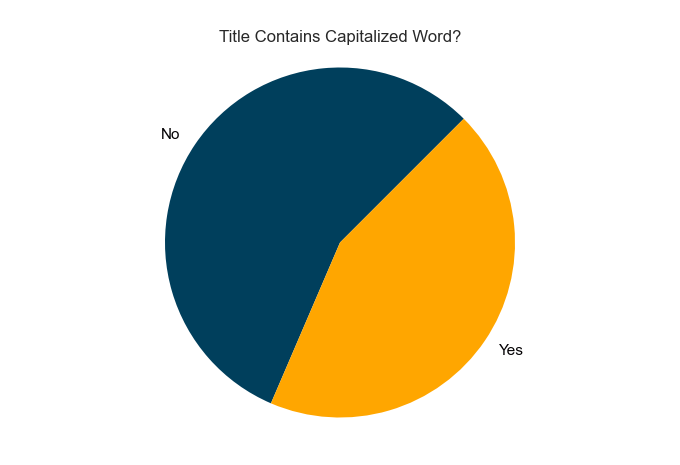

In [8]:
# Bir stringde tamamen büyük harflerle yazılmış bir kelime olup olmadığını kontrol edecek fonksiyon.
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


#Her başlıkta büyük harfli bir kelime olup olmadığını kontrol eder ve sonucu contains_capitalized sütununda saklar.
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

#contains_capitalized sütunundaki True ve False değerlerinin sayısını bir sözlük olarak alır.
value_counts = df["contains_capitalized"].value_counts().to_dict()

#Bir pasta grafiği çizmek için figür ve eksen oluşturur.
fig, ax = plt.subplots()

#Büyük harfli kelime içeren ve içermeyen başlıkların oranını bir pasta grafiğinde gösterir.
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)

#Pastanın tam bir daire şeklinde görünmesini sağlar.
_ = ax.axis('equal')

#Grafik başlığı
_ = ax.set_title('Title Contains Capitalized Word?')

C:\Users\Asus\AppData\Local\Temp\ipykernel_9692\392407296.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(df["title_length"], kde=False, rug=False,


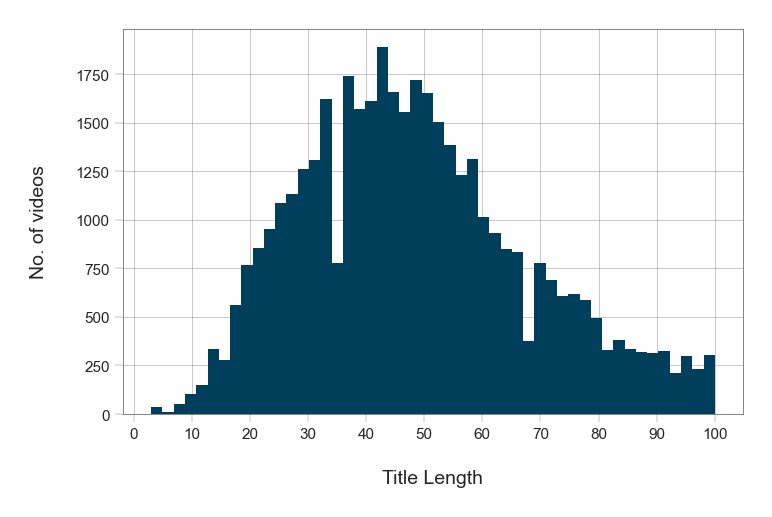

In [9]:
# Her başlığın karakter sayısını hesaplar ve title_length adlı yeni bir sütun oluşturur.
df["title_length"] = df["title"].apply(lambda x: len(x))

# Bir figür ve eksen oluşturur, veri görselleştirmesi için alan hazırlar.
fig, ax = plt.subplots()
# title_length sütunundaki verilerin dağılımını gösteren histogram çizer, renk ve görsellik ayarları yapar.
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
# X eksenindeki etiketleri 0 ile 100 arasında 10'ar artan şekilde ayarlar.
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

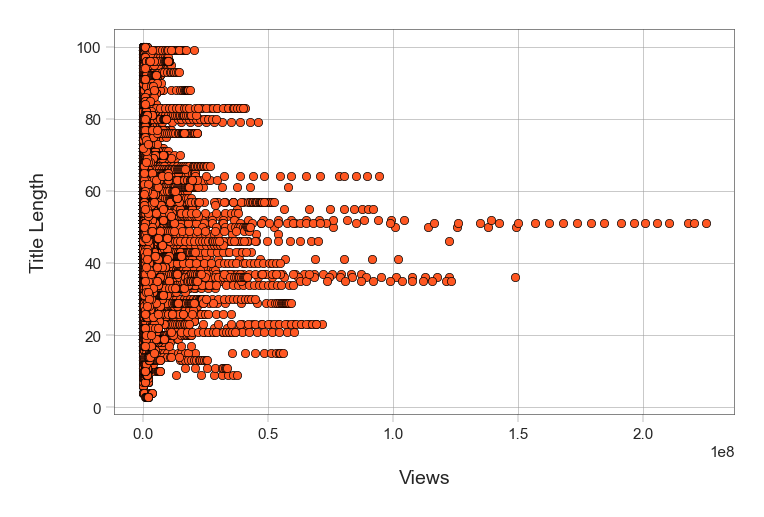

In [10]:
fig, ax = plt.subplots()
#views ile title_length arasındaki ilişkiyi gösteren bir scatter grafiği çizer, nokta renklerini ve kenar çizgilerini ayarlar.
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

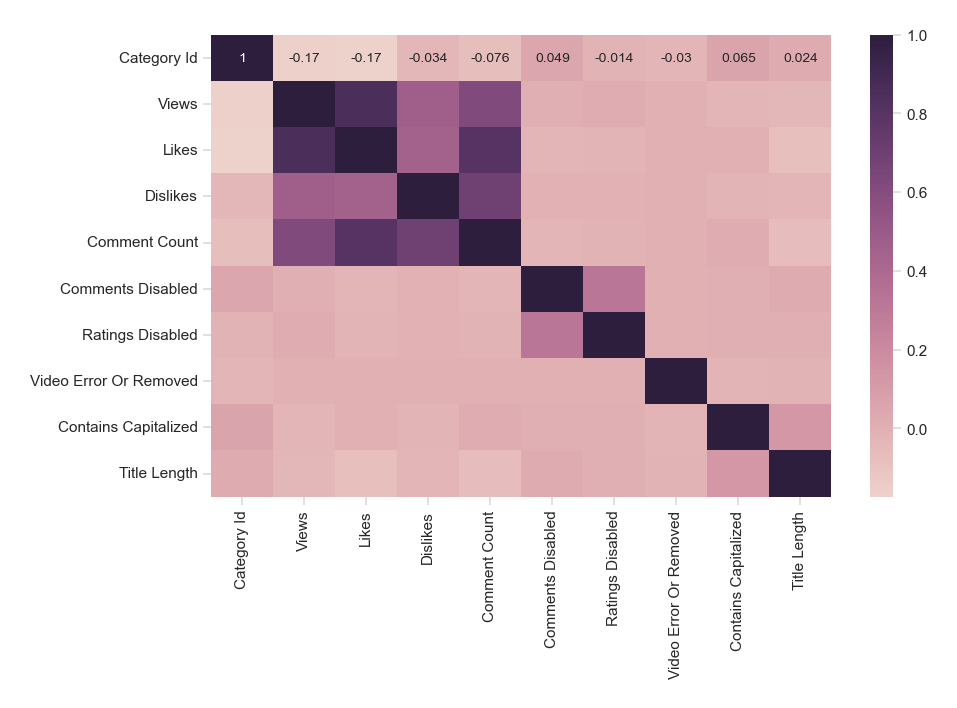

In [11]:
# Sayısal sütunları al
numeric_columns = df.select_dtypes(include=['number', 'bool']).columns

# Bu sayısal sütunların isimlerini daha okunabilir hale getir
h_labels = [x.replace('_', ' ').title() for x in numeric_columns]

# Korelasyon matrisini hesapla
corr_matrix = df[numeric_columns].corr()

# Grafik oluştur
fig, ax = plt.subplots(figsize=(10, 6))
_ = sns.heatmap(corr_matrix, annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)


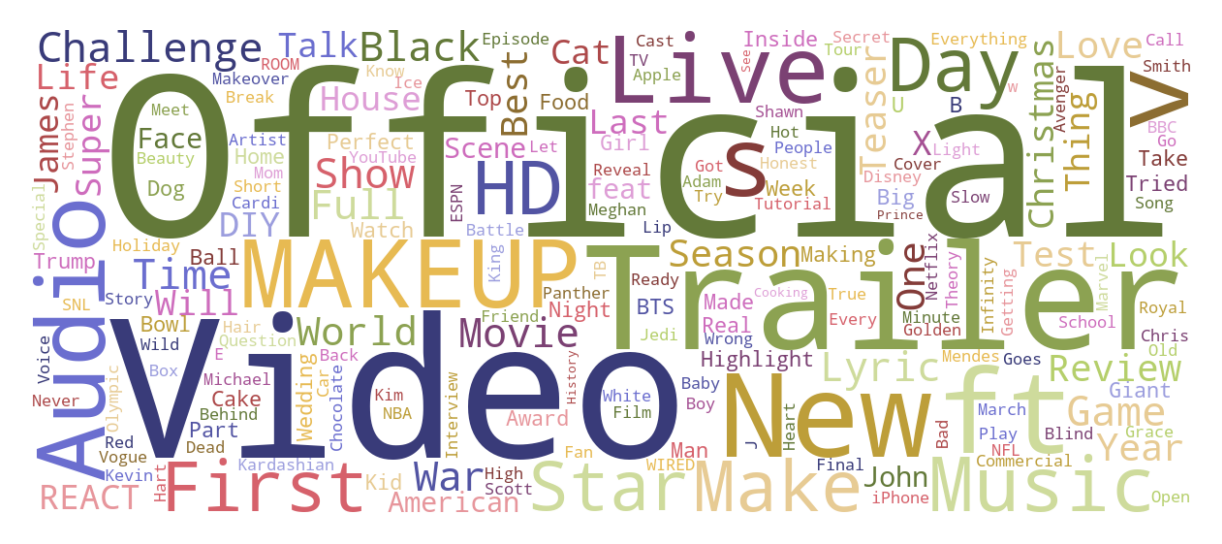

In [12]:
#DataFrame'deki her başlık (title) için, kelimeleri ayırarak bir liste oluşturur.
title_words = list(df["title"].apply(lambda x: x.split()))

#Başlıklar içinde bulunan tüm kelimeleri düz bir listeye çevirir.
title_words = [x for y in title_words for x in y]
#Kelimeleri birleştirerek bir kelime bulutu (WordCloud) nesnesi oluşturur, bazı görsel özellikleri ayarlar.
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')

#Görselleştirmede eksenleri gizler.
_ = plt.axis("off")